# 本章的主要知识点：
> ID3、ID4.5、CART决策树，并了解剪枝的作用

# 决策树介绍学习目标：
- 了解决策树算法基本思想
- 了解sklearn中决策树API
- 知道构建决策树的三个步骤


--- 
# 1、什么是决策树？
> 决策树（Decision Tree）是通过一系列的规则将数据分割成不同类别，决策树算法是一种监督学习的算
# 2、决策树构建的三个步骤？
- 特征选择：选取有较强分类能力的特征
- 决策树生成
- 决策树剪枝





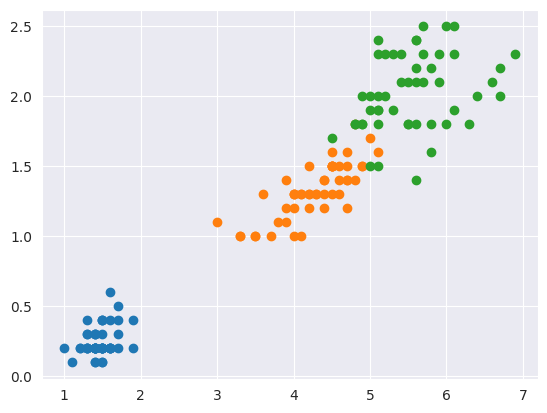

In [41]:
# 导入numpy包
import numpy as np

# 导入Matplotlib绘图库中pyplot模块
import matplotlib.pyplot as plt

# 导入sklearn中鸢尾花数据集
from sklearn import datasets

# 导入鸢尾花数据集
iris = datasets.load_iris()
# array[start:stop:step] 默认步长是 1 ，多个维度用逗号拆分
X = iris.data[:, 2:]
y = iris.target


plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])

plt.show()

In [55]:
# 导入决策树模型
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [43]:
# 着魔模型决策树边界，并绘制图像



array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2])

In [64]:
# 导入matplotlib颜色映射表模块
from matplotlib.colors import ListedColormap

def decision_tree_boundary(model, axis):
        '''
        根据模型绘制决策树的决策边界
        :param model: 
        :param axis: 
        :return: 
        '''
        
        # 1、生成等距的数值序列，并将序列压缩到-1到1之间
        dimension1 = np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1)
        dimension2 = np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
        
        # 2、生成一个高纬网格
        x0, x1 = np.meshgrid(dimension1, dimension2)

        # 3、将数组水平堆叠（ravel：将多维数组转换为一维数组）
        X_new = np.c_[x0.ravel(), x1.ravel()]
        
        # 4、模型预测
        y_predict = model.predict(X_new)

        # 5、预测结果重塑
        zz = y_predict.reshape(x0.shape)

        # 6、构造颜色映射表列表
        custom_map = ListedColormap(["#EF9A9A","#FFF59D","#90CAF9"])

        # 7、生成带有颜色填充的等高线
        plt.contourf(x0, x1 ,zz, linewidths=5, cmap=custom_map)
        return None

/tmp/ipykernel_30686/1274126092.py:32: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1 ,zz, linewidths=5, cmap=custom_map)


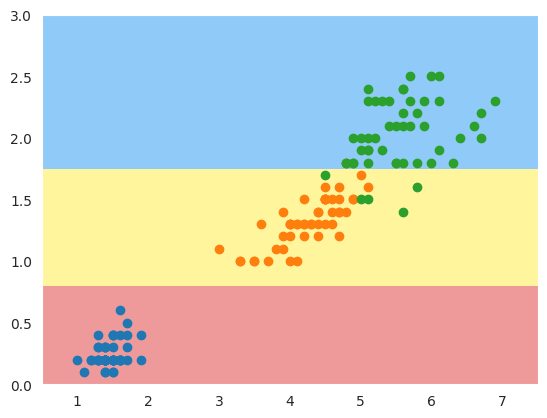

In [65]:
# 绘制决策边界
decision_tree_boundary(tree, axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

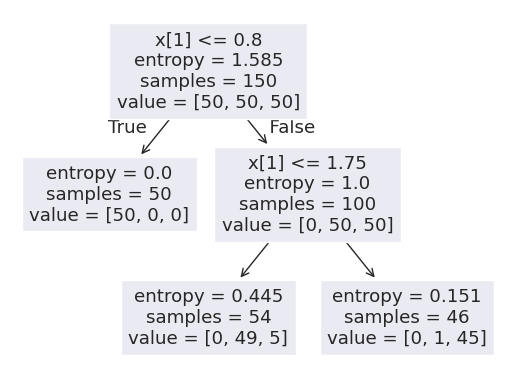

In [67]:
# 树模型可视化

# 导入树模型图形绘制模块
from sklearn.tree import plot_tree
# 导入mat
import matplotlib.pyplot as plt

plot_tree(tree)
plt.show()

# X[1]<= 0.8 作为第一次分割的依据，满足条件的所有样本均为统一类别
# X[1] > 0.8 依据 X[1]<= 1.75 为划分依据
# 由于设置了树的最大深度为2，第二层的两个叶子节点没有完全区分开

In [69]:
# 基于规则构建决策树
# 1、特征选择：选择具有较强分类能力的特征
# 2、决策树生成
# 3、决策树剪枝

# 小结：
## 决策树算法特点：
- 是非参数学习算法
- 可以解决分类（多分类）问题
- 可以解决回归问题：落在子节点上的数据平均值作为回归结果
## 决策树API
```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
```
## 构建决策树的三个步骤：
- 特征选择：选择具有较强分类能力的特征
- 决策树构建
- 决策树剪枝